# Финансовый модулятор

## Импорт необходимым библиотек и данных

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy.special
import os

this_dir = os.getcwd()

svetofordata = pd.read_excel(
    this_dir+r'\2 Данные конвертированные\Конвертированные данные светофор.xlsx')
testdata = pd.read_excel(
    this_dir+r'\2 Данные конвертированные\test.xlsx')
jdata = pd.read_excel(
    this_dir+r'\2 Данные конвертированные\Конвертированные данные ИО.xlsx')

df = pd.concat([testdata, svetofordata, jdata], axis=0)
df = df.reset_index()

df.fillna(0, inplace=True)

goodbad = 90
df['fact bad'] = np.where(df['Макс просрочка'] > goodbad, 1, 0)
df['fact good'] = np.where(df['Макс просрочка'] > goodbad, 0, 1)

In [2]:
df

,index,kind,Макс просрочка,name,date,1000,1100,1200,1300,1400,...,9200,9300,9400,9500,id,Unnamed: 0,id_raw,type,fact bad,fact good
0,0,test,0.0,test 1,43100,2972.0,0.0,974867.0,69410.0,1469.0,...,0.0,12687.0,0.0,0.0,0.000000e+00,0.0,0,0,0,1
1,1,test,0.0,test 2,42735,44190.0,0.0,1234055.0,83375.0,17422.0,...,0.0,16676.0,0.0,0.0,0.000000e+00,0.0,0,0,0,1
2,2,test,0.0,test 3,42369,7680.0,0.0,1026678.0,60009.0,13420.0,...,0.0,15852.0,0.0,0.0,0.000000e+00,0.0,0,0,0,1
3,0,светофор,450.0,Andis Oil Groupe 307526272.xlsx,0,0.0,0.0,0.0,390000000.0,0.0,...,0.0,0.0,0.0,0.0,3.075263e+08,0.0,0,0,1,0
4,1,светофор,12.0,Feruz Xislat Shijoat 303287684.xlsx,0,0.0,0.0,0.0,140841.6,125.6,...,0.0,0.0,0.0,0.0,3.032877e+08,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,4462,ИО,0.0,"ТОО ""Шымкентстрой""",2018-01-01 00:00:00,7453.0,0.0,19843.0,559364.0,2666.0,...,0.0,0.0,0.0,0.0,9.903400e+11,6016.0,990340008713,SP,0,1
5796,4463,ИО,0.0,"ТОО ""Шымкентстрой""",2019-01-01 00:00:00,1139.0,0.0,166167.0,382261.0,200.0,...,102.0,0.0,0.0,0.0,9.903400e+11,6017.0,990340008713,SP,0,1
5797,4464,ИО,0.0,"ТОО ""Шымкентстрой""",2017-01-01 00:00:00,191900.0,0.0,158908.0,257719.0,0.0,...,0.0,0.0,0.0,0.0,9.903400e+11,6018.0,990340008713,SP,0,1
5798,4465,ИО,0.0,"ТОО ""Шымкентстрой""",2018-01-01 00:00:00,7453.0,0.0,19843.0,559364.0,2666.0,...,0.0,0.0,0.0,0.0,9.903400e+11,6019.0,990340008713,SP,0,1


### Формат дат и фильтр

In [3]:
filter_by_date = True
annualize = True

df['date sys'] = pd.to_datetime(
    arg=df['date'], 
    format='%Y-%m-%d', 
    errors='coerce',
)
df['data days'] = (df['date sys'] - (df['date sys'] - pd.offsets.YearBegin(1))).dt.days

filter_1q = df['data days'] > 88
filter_2015 = df['date sys'] > '2015-01-01'

df['near year'] = df['data days'] > 360

if (filter_by_date == True):
    df = df[filter_1q & filter_2015]
    pass

if (annualize == True):
    df['annualizer'] = np.where(df['data days'] > 360, 1, df['data days']/365)
else:
    df['annualizer'] = 1

C:\Users\User\AppData\Local\Temp\ipykernel_2488\1091784257.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['annualizer'] = np.where(df['data days'] > 360, 1, df['data days']/365)


## Итоги по балансу

In [4]:
list_total_current_assets = [c for c in df.columns if c.lower()[:1] == '1']
df['total_current_assets'] = df[list_total_current_assets].sum(axis=1)

list_total_noncurrent_assets = [c for c in df.columns if c.lower()[:1] == '2']
df['total_noncurrent_assets'] = df[list_total_noncurrent_assets].sum(axis=1)

df['total_assets'] = df['total_current_assets'] + df['total_noncurrent_assets']

list_total_current_liabilities = [c for c in df.columns if c.lower()[:1] == '3']
df['total_current_liabilities'] = df[list_total_current_liabilities].sum(axis=1)

list_total_noncurrent_liabilities = [c for c in df.columns if c.lower()[:1] == '4']
df['total_noncurrent_liabilities'] = df[list_total_noncurrent_liabilities].sum(axis=1)

list_total_equity = [c for c in df.columns if c.lower()[:1] == '5']
df['total_equity'] = df[list_total_equity].sum(axis=1)

df['total_liabilities'] = df['total_current_liabilities'] + df['total_noncurrent_liabilities']

df['total_equity_and_liabilities'] = df['total_liabilities'] + df['total_equity']

C:\Users\User\AppData\Local\Temp\ipykernel_2488\2406684383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_current_assets'] = df[list_total_current_assets].sum(axis=1)
C:\Users\User\AppData\Local\Temp\ipykernel_2488\2406684383.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_noncurrent_assets'] = df[list_total_noncurrent_assets].sum(axis=1)
C:\Users\User\AppData\Local\Temp\ipykernel_2488\2406684383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

## Итоги по ОПУ

In [5]:
df['gross_profit'] = (df['6000'] - df['7000']) / df['annualizer']

df['operating_profit_or_loss'] = (
    df['gross_profit'] - 
    df['7100'] - 
    df['7200'] + 
    df['9100'] - 
    df['9200']
) / df['annualizer']

df['EBITDA'] = (df['operating_profit_or_loss'] + df['9300']) / df['annualizer']

df['profit_or_loss_before_income_tax'] = (
    df['operating_profit_or_loss'] + 
    df['6100'] + 
    df['6200'] + 
    df['6300'] + 
    df['6400'] - 
    df['7300'] - 
    df['7400'] - 
    df['7500'] - 
    df['7600']
) / df['annualizer']

df['EBIT'] = (df['profit_or_loss_before_income_tax'] + df['7300']) / df['annualizer']

df['net_profit_or_loss'] = (df['profit_or_loss_before_income_tax'] - df['7700']) / df['annualizer']

C:\Users\User\AppData\Local\Temp\ipykernel_2488\525153500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gross_profit'] = (df['6000'] - df['7000']) / df['annualizer']
C:\Users\User\AppData\Local\Temp\ipykernel_2488\525153500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['operating_profit_or_loss'] = (
C:\Users\User\AppData\Local\Temp\ipykernel_2488\525153500.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

## Коэффициенты

In [6]:
# текущая ликвидность
df['cf currentRatio'] = df['total_current_assets'] / df['total_current_liabilities']

# текущая ликвидность для модели Альтмана
df['cf currentRatioAltman'] = df['total_current_assets'] / (df['total_current_liabilities'] - df['3500'] - df['3400'])

# доля обязательств в активах
df['cf total_liabilities on total_equity_and_liabilities'] = (
    df['total_liabilities'] / df['total_equity_and_liabilities']
)

# рабочий капитал
df['cf workingCapital'] = df['total_current_assets'] - df['total_current_liabilities']

# кф рабочего капитала
df['cf workingCapital on total_assets'] = df['cf workingCapital'] / df['total_assets']

df['cf workingCapital on liabilities'] = df['cf workingCapital'] / df['total_liabilities']

# рентабельность активов
df['cf ROA'] = df['net_profit_or_loss'] / df['total_assets'] # Return on Assets

# прибыль до налогов к активам
df['cf PBT on total_assets'] = df['profit_or_loss_before_income_tax'] / df['total_assets'] # profit before tax

# прибыль до налогов к активам
df['cf PBT on total_equity'] = df['profit_or_loss_before_income_tax'] / df['total_equity'] # profit before tax

# выручка к активам
df['cf ATR'] = df['6000'] / df['total_assets'] # Asset Turnover Ratio

# доля СК
df['cf total_equity on total_liabilities'] = df['total_equity'] / df['total_liabilities']

# Отношение прибыли до уплаты налога к сумме текущих обязательств
df['cf OPL on liabilities'] = df['operating_profit_or_loss'] / df['total_current_liabilities'] # operational profit or loss

df['cf total_current_assets on total_liabilities'] = df['total_current_assets'] / df['total_liabilities']

df['cf total_current_liabilities on total_assets'] = df['total_current_liabilities'] / df['total_assets']

df['cf EBIT on total_assets'] = df['EBIT'] / df['total_assets'] # earnings before interest, tax

df['cf EBIT on current_liabilities'] = df['EBIT'] / df['total_current_liabilities']

df['cf netProfit on total_equity'] = df['net_profit_or_loss'] / df['total_equity']

df['cf netProfit on expenses'] = df['net_profit_or_loss'] / (
    df['7000'] + 
    df['7100'] + 
    df['7200'] + 
    df['7300'] + 
    df['7400'] + 
    df['7500'] + 
    df['7600']
)

df['cf netProfit on liabilities'] = df['net_profit_or_loss'] / df['total_liabilities']

# Исключен вместе с Бивером
# df['cf netProfit+DA / liabilities'] = (df['net_profit_or_loss'] + df['9300']) / df['total_liabilities']

df['cf OPL on total_assets'] = df['operating_profit_or_loss'] / df['total_assets']

df['cf netLoss'] = np.where(df['net_profit_or_loss'] < 0, df['net_profit_or_loss'], 0)

df['cf retainedEarnings'] = df['5600'] / df['total_assets']

df['cf total_noncurrent_liabilities rate'] = df['total_noncurrent_liabilities'] / df['total_equity_and_liabilities']

df['cf total_current_liabilities rate'] = df['total_current_liabilities'] / df['total_equity_and_liabilities']

df['cf tangible assets'] = df['total_assets'] - df['2700'] - df['2800'] - df['2100'] - df['1200'] - df['1400']

df['cf tangible assets log10 rate'] = np.log10(df['cf tangible assets'])

df['cf EBIT/interest log10'] = np.log10(df['EBIT'] / df['7300'])

# Коэффициент обеспеченности собственными средствами
df['cf (total_equity - total_noncurrent_assets) / total_current_assets'] = (
    df['total_equity'] - df['total_noncurrent_assets'])/df['total_current_assets']

# Интенсивность оборота авансируемого капитала
df['cf 6000 / Assets'] = df['6000'] / (df['total_noncurrent_assets'] + df['total_current_assets'])

# Коэффициент менеджмента
df['cf OPL / 6000'] = df['operating_profit_or_loss'] / df['6000']

# Рентабельность собственного капитала
df['cf OPL / Equity'] = df['operating_profit_or_loss'] / df['total_equity']

# (капитал-нематериальные активы)/обязательства
df['cf (total_equity - intangibleAssets) / total_liabilities'] = (
    df['total_equity'] - df['2700']
) / df['total_liabilities']

# Дебиторская задолженность/обязательства
df['cf accounts receivable on total_liabilities'] = df['1200'] / df['total_liabilities']

# Рентабельность затрат (прибыль до налога/себестоимость)
df['cf PBT on COGS'] = df['profit_or_loss_before_income_tax'] / df['7000']

# Коэффициент оборачиваемости собственного капитала (опер прибыль/капитал)
df['cf OPL on total_equity'] = df['operating_profit_or_loss'] / df['total_equity']

# Коэффициент доли быстрореализуемых активов в балансе
df['cf cash and stocks / assets'] = (df['1000'] + df['1100'])/ df['total_assets']

# Выручка на деньги и фин активы
df['cf 6000 on cash and stocks'] = df['6000'] / (df['1000'] + df['1100'])

# Рентабельность активов через EBIT
df['cf EBIT on total_assets'] = df['EBIT'] / df['total_assets']

# Доля обязательств в активах
df['cf total_liabilities on total_assets'] = df['total_liabilities'] / df['total_assets']


df['cf total_equity on treasury_stock'] = (df['total_equity'] - df['5100'])

df['cf workingCapital on EBIT'] = (df['cf workingCapital'] / df['EBIT'])


# Очистка бесконечностей и не числовых значений
df.replace([np.inf, -np.inf], 0, inplace=True)
df.replace([np.nan], 0, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_2488\239891105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cf currentRatio'] = df['total_current_assets'] / df['total_current_liabilities']
C:\Users\User\AppData\Local\Temp\ipykernel_2488\239891105.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cf currentRatioAltman'] = df['total_current_assets'] / (df['total_current_liabilities'] - df['3500'] - df['3400'])
C:\Users\User\AppData\Local\Temp\ipykernel_2488\239891105.py:8: SettingWithCopyWarning: 

C:\Users\User\AppData\Local\Temp\ipykernel_2488\239891105.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cf total_noncurrent_liabilities rate'] = df['total_noncurrent_liabilities'] / df['total_equity_and_liabilities']
C:\Users\User\AppData\Local\Temp\ipykernel_2488\239891105.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cf total_current_liabilities rate'] = df['total_current_liabilities'] / df['total_equity_and_liabilities']
C:\Users\User\AppData\Local\Temp\ipykernel_2488\239891105.py:7

In [7]:
df

,index,kind,Макс просрочка,name,date,1000,1100,1200,1300,1400,...,cf OPL / Equity,cf (total_equity - intangibleAssets) / total_liabilities,cf accounts receivable on total_liabilities,cf PBT on COGS,cf OPL on total_equity,cf cash and stocks / assets,cf 6000 on cash and stocks,cf total_liabilities on total_assets,cf total_equity on treasury_stock,cf workingCapital on EBIT
1333,0,ИО,189.0,ТОО Mobil Realty Management Company,2019-01-01 00:00:00,112105.0,0.0,35459.0,16278.0,1426.0,...,-0.905240,-0.174048,0.007595,-0.425433,-0.905240,0.029050,9.942322,1.209766,-809494.00,-0.547070
1334,1,ИО,189.0,ТОО Mobil Realty Management Company,2020-01-01 00:00:00,89436.0,0.0,68032.0,20295.0,1512.0,...,-0.437970,-0.225010,0.014071,-0.636848,-0.437970,0.023849,11.521882,1.289289,-1084838.00,-1.138264
1335,2,ИО,189.0,ТОО Mobil Realty Management Company,2020-10-01 00:00:00,50332.0,0.0,80387.0,19169.0,842.0,...,-0.407710,-0.266480,0.016334,-0.570924,-0.407710,0.013930,13.650978,1.362136,-1308434.00,-1.014837
1336,3,ИО,0.0,ТОО «Молочный Завод «Солнечный»,2019-12-31 00:00:00,504839.0,2449010.0,0.0,4659705.0,0.0,...,0.506527,0.242489,0.000000,0.052486,0.506527,0.113770,10.334012,0.804102,5086163.00,-3.568237
1337,4,ИО,0.0,ТОО «Молочный Завод «Солнечный»,2020-12-31 00:00:00,390905.0,3035573.0,0.0,6243879.0,0.0,...,0.536018,0.261052,0.000000,0.037101,0.536018,0.121898,9.374851,0.792363,5836536.00,-3.032013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,4462,ИО,0.0,"ТОО ""Шымкентстрой""",2018-01-01 00:00:00,7453.0,0.0,19843.0,559364.0,2666.0,...,0.539259,1.779596,0.086614,0.117257,0.539259,0.011704,295.970079,0.359765,407700.00,1.560193
5796,4463,ИО,0.0,"ТОО ""Шымкентстрой""",2019-01-01 00:00:00,1139.0,0.0,166167.0,382261.0,200.0,...,-0.048525,1.720264,0.763604,-0.038258,-0.048525,0.001924,685.281826,0.367612,374345.00,-18.401652
5797,4464,ИО,0.0,"ТОО ""Шымкентстрой""",2017-01-01 00:00:00,191900.0,0.0,158908.0,257719.0,0.0,...,0.851820,0.380105,0.336259,0.154132,0.851820,0.294233,5.996634,0.724583,179628.27,0.914894
5798,4465,ИО,0.0,"ТОО ""Шымкентстрой""",2018-01-01 00:00:00,7453.0,0.0,19843.0,559364.0,2666.0,...,0.539259,1.779596,0.086614,0.117257,0.539259,0.011704,295.970079,0.359765,407700.00,1.560193


## Модели

### Модель Альтмана 2-х факторная

In [8]:
df['Z-score Altman 2x'] = (
    -0.3877 - 
    (1.0736 * df['cf currentRatioAltman']) + 
    (0.0579 * df['cf total_liabilities on total_equity_and_liabilities'])
)

conditionsAltman2x = [
    (df['Z-score Altman 2x'] == 0),
    (df['Z-score Altman 2x'] < 0),
    (df['Z-score Altman 2x'] > 0)
]

valuesAltman2x = [
    'равна 50%', 
    'меньше 50%', 
    'больше 50%'
]

df['Модель Альтмана 2х'] = np.select(conditionsAltman2x, valuesAltman2x)

# прогнозные данные
valuesAltman2xPred = [1, 0, 1]

df['pred Altman 2x'] = np.select(conditionsAltman2x, valuesAltman2xPred)

C:\Users\User\AppData\Local\Temp\ipykernel_2488\1071300203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Z-score Altman 2x'] = (
C:\Users\User\AppData\Local\Temp\ipykernel_2488\1071300203.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Модель Альтмана 2х'] = np.select(conditionsAltman2x, valuesAltman2x)
C:\Users\User\AppData\Local\Temp\ipykernel_2488\1071300203.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

### Модель Альтмана 5 факторная

In [9]:
df['Z-score Altman 5x'] = (
    0.717 * df['cf workingCapital on total_assets'] + 
    0.847 * df['cf ROA'] + 
    3.107 * df['cf PBT on total_assets'] + 
    0.420 * df['cf total_equity on total_liabilities'] + 
    0.998 * df['cf ATR']
)

conditionsAltman5x = [
    (df['Z-score Altman 5x'] < 1.23),
    (df['Z-score Altman 5x'] < 2.9),
    (df['Z-score Altman 5x'] >= 2.9)
]

valuesAltman5x = [
    'высокая', 
    'равна 50%', 
    'маловероятно'
]

df['Модель Альтмана 5х'] = np.select(conditionsAltman5x, valuesAltman5x)

# прогнозные данные
valuesAltman5xPred = [1, 0, 0]

df['pred Altman 5x'] = np.select(conditionsAltman5x, valuesAltman5xPred)

C:\Users\User\AppData\Local\Temp\ipykernel_2488\1551879790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Z-score Altman 5x'] = (
C:\Users\User\AppData\Local\Temp\ipykernel_2488\1551879790.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Модель Альтмана 5х'] = np.select(conditionsAltman5x, valuesAltman5x)
C:\Users\User\AppData\Local\Temp\ipykernel_2488\1551879790.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

### Модель Таффлера-Тишоу

In [10]:
df['Z-score Tafler'] =(
    0.53 * df['cf OPL on liabilities'] + 
    0.13 * df['cf total_current_assets on total_liabilities'] + 
    0.18 * df['cf total_current_liabilities on total_assets'] + 
    0.16 * df['cf ATR']
)

conditionsTafler = [
    (df['Z-score Tafler'] > 0.3),
    (df['Z-score Tafler'] < 0.2),
    (df['Z-score Tafler'].between(0.2, 0.3))
]

valuesTafler = [
    'низкая', 
    'высокая',
    'средняя'
]

df['Модель Таффлера-Тишоу'] = np.select(conditionsTafler, valuesTafler)

# прогнозные данные
valuesTaflerPred = [0, 1, 0]

df['pred Tafler'] = np.select(conditionsTafler, valuesTaflerPred)

C:\Users\User\AppData\Local\Temp\ipykernel_2488\160638680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Z-score Tafler'] =(
C:\Users\User\AppData\Local\Temp\ipykernel_2488\160638680.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Модель Таффлера-Тишоу'] = np.select(conditionsTafler, valuesTafler)
C:\Users\User\AppData\Local\Temp\ipykernel_2488\160638680.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

### Модель Фулмера

In [11]:
# Модель предусматривает средние показатели (нужны данные на два периода)

df['H-score Fulmer'] = (
    5.528 * df['cf retainedEarnings'] + 
    0.212 * df['cf ATR'] + 
    0.073 * df['cf PBT on total_equity'] + 
    1.270 * df['cf netProfit on liabilities'] - 
    0.120 * df['cf total_noncurrent_liabilities rate'] + 
    2.335 * df['cf total_current_liabilities rate'] + 
    0.575 * df['cf tangible assets log10 rate'] + 
    1.083 * df['cf workingCapital on liabilities'] + 
    0.894 * df['cf EBIT/interest log10'] - 
    6.075
)

df['Модель Фулмера'] = np.where(df['H-score Fulmer'] < 0, 'высокая', 'низкая')

# прогнозные данные
df['pred Fulmer'] = np.where(df['H-score Fulmer'] < 0, 1, 0)

C:\Users\User\AppData\Local\Temp\ipykernel_2488\2519546708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['H-score Fulmer'] = (
C:\Users\User\AppData\Local\Temp\ipykernel_2488\2519546708.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Модель Фулмера'] = np.where(df['H-score Fulmer'] < 0, 'высокая', 'низкая')
C:\Users\User\AppData\Local\Temp\ipykernel_2488\2519546708.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

### Модель Спрингейта

In [12]:
df['Z-score Springate'] = (
    1.03 * df['cf workingCapital on total_assets'] + 
    3.07 * df['cf EBIT on total_assets'] + 
    0.66 * df['cf EBIT on current_liabilities'] + 
    0.40 * df['cf ATR']
)

df['Модель Спрингейта'] = np.where(df['Z-score Springate'] < 0.862, 'высокая', 'низкая')

# прогнозные данные
df['pred Springate'] = np.where(df['Z-score Springate'] < 0.862, 1, 0)

C:\Users\User\AppData\Local\Temp\ipykernel_2488\2343243755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Z-score Springate'] = (
C:\Users\User\AppData\Local\Temp\ipykernel_2488\2343243755.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Модель Спрингейта'] = np.where(df['Z-score Springate'] < 0.862, 'высокая', 'низкая')
C:\Users\User\AppData\Local\Temp\ipykernel_2488\2343243755.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

### Модель ИГЭА

In [13]:
# ИГЭА - Иркутская государственная экономическая академия

df['R-score ИГЭА'] = (
    8.380 * df['cf workingCapital on total_assets'] + 
    df['cf netProfit on total_equity'] + 
    0.054 * df['cf ATR'] + 
    0.630 * df['cf netProfit on expenses'])

conditionsIGEA = [
    (df['R-score ИГЭА'] < 0),
    (df['R-score ИГЭА'].between(0, 0.18)),
    (df['R-score ИГЭА'].between(0.18, 0.32)),
    (df['R-score ИГЭА'].between(0.32, 0.42)),
    (df['R-score ИГЭА'] > 0.42),
]

valuesIGEA = [
    'Максимальная (90%-100%)', 
    'Высокая (60%-80%)',
    'Средняя (35%-50%)',
    'Низкая (15%-20%)',
    'Минимальная (до 10%)'
]

df['Модель ИГЭА'] = np.select(conditionsIGEA, valuesIGEA)

# прогнозные данные
valuesIGEAPred = [1, 1, 1, 1, 0]

df['pred IGEA'] = np.select(conditionsIGEA, valuesIGEAPred)

C:\Users\User\AppData\Local\Temp\ipykernel_2488\229928015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['R-score ИГЭА'] = (
C:\Users\User\AppData\Local\Temp\ipykernel_2488\229928015.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Модель ИГЭА'] = np.select(conditionsIGEA, valuesIGEA)
C:\Users\User\AppData\Local\Temp\ipykernel_2488\229928015.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

### Модель Бивера
Не применялась т.к. требует дополнительной аналитики (интерпретации данных аналитеком)

### Модель Лиса

In [14]:
df['Z-score Lis'] = (
    0.063 * df['cf workingCapital on total_assets'] + 
    0.092 * df['cf OPL on total_assets'] + 
    0.057 * df['cf ROA'] + 
    0.001 * df['cf total_equity on total_liabilities']
)

df['Модель Лиса'] = np.where(
    df['Z-score Lis'] < 0.037, 
    'положение предприятия неустойчиво', 
    'положение предприятия устойчиво'
)

# прогнозные данные
df['pred Lis'] = np.where(df['Z-score Lis'] < 0.037, 1, 0)

C:\Users\User\AppData\Local\Temp\ipykernel_2488\3144206538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Z-score Lis'] = (
C:\Users\User\AppData\Local\Temp\ipykernel_2488\3144206538.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Модель Лиса'] = np.where(
C:\Users\User\AppData\Local\Temp\ipykernel_2488\3144206538.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

### Модель Зайцевой
Не применялась т.к.:
* Модель предусматривает средние показатели (нужны данные на два периода).
* Кроме того необходимы данные за прошлый период (сравнивает изменение с прошлым периодом)

### Модель Ж. Конана и М. Голдера
Не применялась т.к.:
* Модель предусматривает средние показатели (нужны данные на два периода)
* Нужны дополнительные данные (затраты на оплату труда)


### Модель Сайфуллина-Кадыкова

In [15]:
df['R-score Sayfullin-Kadykov'] = (
    2.00 * df['cf (total_equity - total_noncurrent_assets) / total_current_assets'] + 
    0.10 * df['cf currentRatioAltman'] + 
    0.08 * df['cf 6000 / Assets'] + 
    0.45 * df['cf OPL / 6000'] + 
    df['cf OPL / Equity']
)

df['Модель Сайфуллина-Кадыкова'] = np.where(
    df['R-score Sayfullin-Kadykov'] < 1, 
    'неудовлетворительное', 
    'удовлетворительное'
)

# прогнозные данные
df['pred Sayfullin-Kadykov'] = np.where(df['R-score Sayfullin-Kadykov'] < 1, 1, 0)

C:\Users\User\AppData\Local\Temp\ipykernel_2488\2564958412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['R-score Sayfullin-Kadykov'] = (
C:\Users\User\AppData\Local\Temp\ipykernel_2488\2564958412.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Модель Сайфуллина-Кадыкова'] = np.where(
C:\Users\User\AppData\Local\Temp\ipykernel_2488\2564958412.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

### Модель Чессера

In [16]:
df['Z Chesser'] = (
    -2.0434 - 
    5.2400 * df['cf cash and stocks / assets'] + 
    0.0053 * df['cf 6000 on cash and stocks'] - 
    6.6507 * df['cf PBT on total_assets'] + 
    4.4009 * df['cf total_liabilities on total_assets'] - 
    0.0791 * df['cf total_equity on treasury_stock'] -
    0.1020 * df['cf workingCapital on EBIT']
)

df['P-score Chesser'] = scipy.special.expit(df['Z Chesser'])

df['Модель Чессера'] = np.where(
    df['P-score Chesser'] >= 0.5, 
    'неудовлетворительное', 
    'удовлетворительное'
)

# прогнозные данные
df['pred Chesser'] = np.where(df['P-score Chesser'] >= 0.5, 1, 0)

C:\Users\User\AppData\Local\Temp\ipykernel_2488\966993320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Z Chesser'] = (
C:\Users\User\AppData\Local\Temp\ipykernel_2488\966993320.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P-score Chesser'] = scipy.special.expit(df['Z Chesser'])
C:\Users\User\AppData\Local\Temp\ipykernel_2488\966993320.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

### Model J

In [17]:
def j_model(x1, x2, x3, x4):
    a = -2.83543130200062
    b = 1.68098162038357
    s_shape_x1 = scipy.special.expit(-(a * x1 + b))

    a = -7.06644135089176
    b = 2.23444084617236
    s_shape_x2 = scipy.special.expit(-(a * x2 + b))

    a = -25.9862960041801
    b = 2.19722457733622
    s_shape_x3 = scipy.special.expit(-(a * x3 + b))

    a = -5.85258726199301
    b = 2.19722457733622
    s_shape_x4 = scipy.special.expit(-(a * x4 + b))

    listShape = (1, s_shape_x1, s_shape_x2, s_shape_x3, s_shape_x4)

    constant = (1.0038, -2.7852, -1.6936, -2.1972, -1.1195)

    z_score_j = np.dot(listShape, constant)

    return z_score_j

In [18]:
def PD_j(z_score):
    a = 0.99
    b = -1.19622993123552
    return scipy.special.expit(a * z_score + b)

In [19]:
# working model
PD_j(j_model(1.00, 0.943487515921344, 0.490733912178866, 22.6983516295612)) == 0.0007172324977659915

True

In [20]:
df['Z-score J-model'] = j_model(
    df['cf (total_equity - intangibleAssets) / total_liabilities'], 
    df['cf accounts receivable on total_liabilities'],
    df['cf PBT on COGS'],
    df['cf OPL on total_equity']
)

df['Модель PD J'] = PD_j(df['Z-score J-model'])

# прогнозные данные
df['pred PD J'] = np.where(df['Модель PD J'] > 0.2384, 1, 0)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\User\AppData\Local\Temp\ipykernel_2488\2236198390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Z-score J-model'] = j_model(
C:\Users\User\AppData\Local\Temp\ipykernel_2488\2236198390.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

## Выгрузка данных

In [21]:
df

,index,kind,Макс просрочка,name,date,1000,1100,1200,1300,1400,...,R-score Sayfullin-Kadykov,Модель Сайфуллина-Кадыкова,pred Sayfullin-Kadykov,Z Chesser,P-score Chesser,Модель Чессера,pred Chesser,Z-score J-model,Модель PD J,pred PD J
1333,0,ИО,189.0,ТОО Mobil Realty Management Company,2019-01-01 00:00:00,112105.0,0.0,35459.0,16278.0,1426.0,...,-53.777891,неудовлетворительное,1,64034.534398,1.0,неудовлетворительное,1,0.547017,0.341935,1
1334,1,ИО,189.0,ТОО Mobil Realty Management Company,2020-01-01 00:00:00,89436.0,0.0,68032.0,20295.0,1512.0,...,-47.648198,неудовлетворительное,1,85814.850210,1.0,неудовлетворительное,1,0.565764,0.346123,1
1335,2,ИО,189.0,ТОО Mobil Realty Management Company,2020-10-01 00:00:00,50332.0,0.0,80387.0,19169.0,842.0,...,-58.932862,неудовлетворительное,1,103501.510208,1.0,неудовлетворительное,1,0.586811,0.350854,1
1336,3,ИО,0.0,ТОО «Молочный Завод «Солнечный»,2019-12-31 00:00:00,504839.0,2449010.0,0.0,4659705.0,0.0,...,-2.052959,неудовлетворительное,1,-402314.461836,0.0,удовлетворительное,0,-1.342805,0.074082,0
1337,4,ИО,0.0,ТОО «Молочный Завод «Солнечный»,2020-12-31 00:00:00,390905.0,3035573.0,0.0,6243879.0,0.0,...,-1.108330,неудовлетворительное,1,-461669.028999,0.0,удовлетворительное,0,-1.242663,0.081177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,4462,ИО,0.0,"ТОО ""Шымкентстрой""",2018-01-01 00:00:00,7453.0,0.0,19843.0,559364.0,2666.0,...,2.344335,удовлетворительное,0,-32250.564964,0.0,удовлетворительное,0,-4.316069,0.004197,0
5796,4463,ИО,0.0,"ТОО ""Шымкентстрой""",2019-01-01 00:00:00,1139.0,0.0,166167.0,382261.0,200.0,...,1.529159,удовлетворительное,0,-29605.241459,0.0,удовлетворительное,0,-3.469919,0.009647,0
5797,4464,ИО,0.0,"ТОО ""Шымкентстрой""",2017-01-01 00:00:00,191900.0,0.0,158908.0,257719.0,0.0,...,1.640847,удовлетворительное,0,-14210.592489,0.0,удовлетворительное,0,-3.830059,0.006773,0
5798,4465,ИО,0.0,"ТОО ""Шымкентстрой""",2018-01-01 00:00:00,7453.0,0.0,19843.0,559364.0,2666.0,...,2.344335,удовлетворительное,0,-32250.564964,0.0,удовлетворительное,0,-4.316069,0.004197,0


In [22]:
df.to_excel(this_dir+r'\3 Данные из финансового модулятора\output.xlsx', index=False)

# Прочее

In [23]:
listModel = [c for c in df.columns if c.lower()[:6] == 'модель']
listModel

['Модель Альтмана 2х',
 'Модель Альтмана 5х',
 'Модель Таффлера-Тишоу',
 'Модель Фулмера',
 'Модель Спрингейта',
 'Модель ИГЭА',
 'Модель Лиса',
 'Модель Сайфуллина-Кадыкова',
 'Модель Чессера',
 'Модель PD J']

In [24]:
listCf = [c for c in df.columns if c.lower()[:2] == 'cf']
listCf

['cf currentRatio',
 'cf currentRatioAltman',
 'cf total_liabilities on total_equity_and_liabilities',
 'cf workingCapital',
 'cf workingCapital on total_assets',
 'cf workingCapital on liabilities',
 'cf ROA',
 'cf PBT on total_assets',
 'cf PBT on total_equity',
 'cf ATR',
 'cf total_equity on total_liabilities',
 'cf OPL on liabilities',
 'cf total_current_assets on total_liabilities',
 'cf total_current_liabilities on total_assets',
 'cf EBIT on total_assets',
 'cf EBIT on current_liabilities',
 'cf netProfit on total_equity',
 'cf netProfit on expenses',
 'cf netProfit on liabilities',
 'cf OPL on total_assets',
 'cf netLoss',
 'cf retainedEarnings',
 'cf total_noncurrent_liabilities rate',
 'cf total_current_liabilities rate',
 'cf tangible assets',
 'cf tangible assets log10 rate',
 'cf EBIT/interest log10',
 'cf (total_equity - total_noncurrent_assets) / total_current_assets',
 'cf 6000 / Assets',
 'cf OPL / 6000',
 'cf OPL / Equity',
 'cf (total_equity - intangibleAssets) / to

In [25]:
listPred = [c for c in df.columns if c.lower()[:4] == 'pred']
for i in listPred:
    print(df[i].value_counts(), '\n')

0    3270
1      24
Name: pred Altman 2x, dtype: int64 

0    2180
1    1114
Name: pred Altman 5x, dtype: int64 

0    2502
1     792
Name: pred Tafler, dtype: int64 

0    2099
1    1195
Name: pred Fulmer, dtype: int64 

0    2101
1    1193
Name: pred Springate, dtype: int64 

0    2081
1    1213
Name: pred IGEA, dtype: int64 

1    1945
0    1349
Name: pred Lis, dtype: int64 

1    1775
0    1519
Name: pred Sayfullin-Kadykov, dtype: int64 

0    2939
1     355
Name: pred Chesser, dtype: int64 

0    2648
1     646
Name: pred PD J, dtype: int64 



In [26]:
max_bdays = (df['Макс просрочка'] > 90)
bad_j = (df['pred PD J'] == 1)
for i in (
    df[max_bdays]
    .sort_values(by='Макс просрочка', ascending=False)['total_equity']
    .head(10)
):
    print(i)

745943.0
671104.0
640559.0
764029.0
671104.0
597826.0
600151.0
589485.0
568997.0
370244.0


<AxesSubplot:>

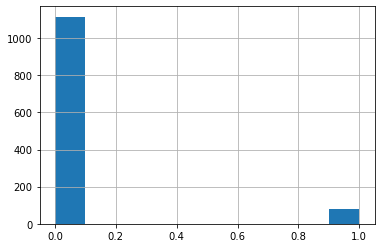

In [27]:
filterBadClients = (df['pred Springate'] == 1)
df[filterBadClients]['fact bad'].hist()